In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pywt
import scipy
import cv2

In [4]:
df = pd.read_json("train/train.json")

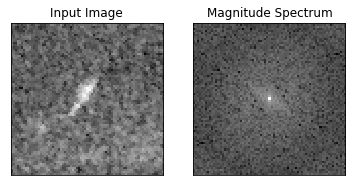

In [5]:
img = np.array(df['band_1'].iloc[6]).reshape(75,75)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

(<matplotlib.text.Text at 0x22b809f34e0>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

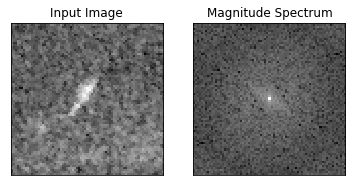

In [6]:
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 100*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

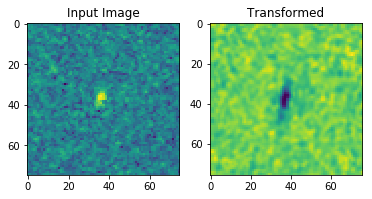

In [53]:
img = np.array(df['band_1'].iloc[2]).reshape(75,75)
kernel = np.ones((2,2),np.float32)/5
dst = cv2.filter2D(img_back,-1,kernel)



plt.subplot(1,2,1),plt.imshow(img)
plt.title('Input Image')
plt.subplot(1,2,2),plt.imshow(dst)
plt.title('Transformed')

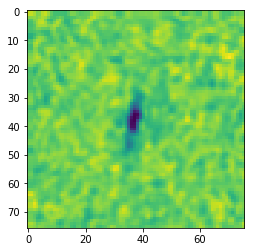

In [55]:
plt.imshow(dst)

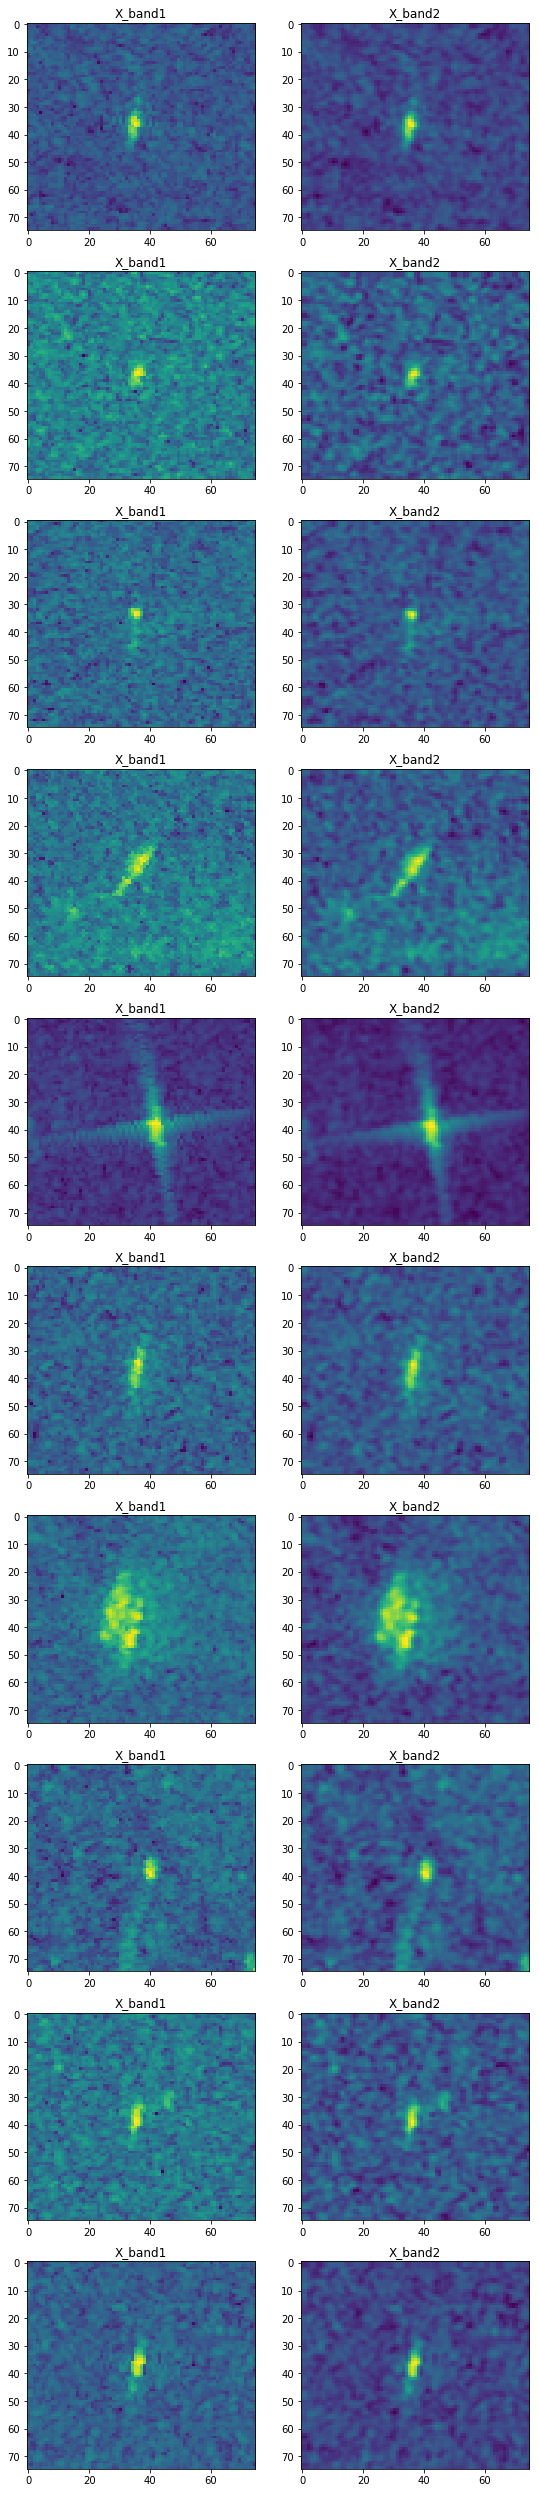

In [65]:
plt.figure(figsize=(9,45))
kernel = np.ones((2,2),np.float32)/5

for i in range(0,20,2):
    img = np.array(df['band_1'].iloc[i]).reshape(75,75)
    dst = cv2.filter2D(img,-1,kernel)
    
       
    for j in [1,2]:

        if (j == 1):
            plt.subplot(10,2,i+1),plt.imshow(img, interpolation='nearest', aspect='auto')
            plt.title('X_band1')
        elif(j == 2):
            plt.subplot(10,2,i+2),plt.imshow(dst, interpolation='nearest', aspect='auto')
            plt.title('X_band2')

## Image Tranformations

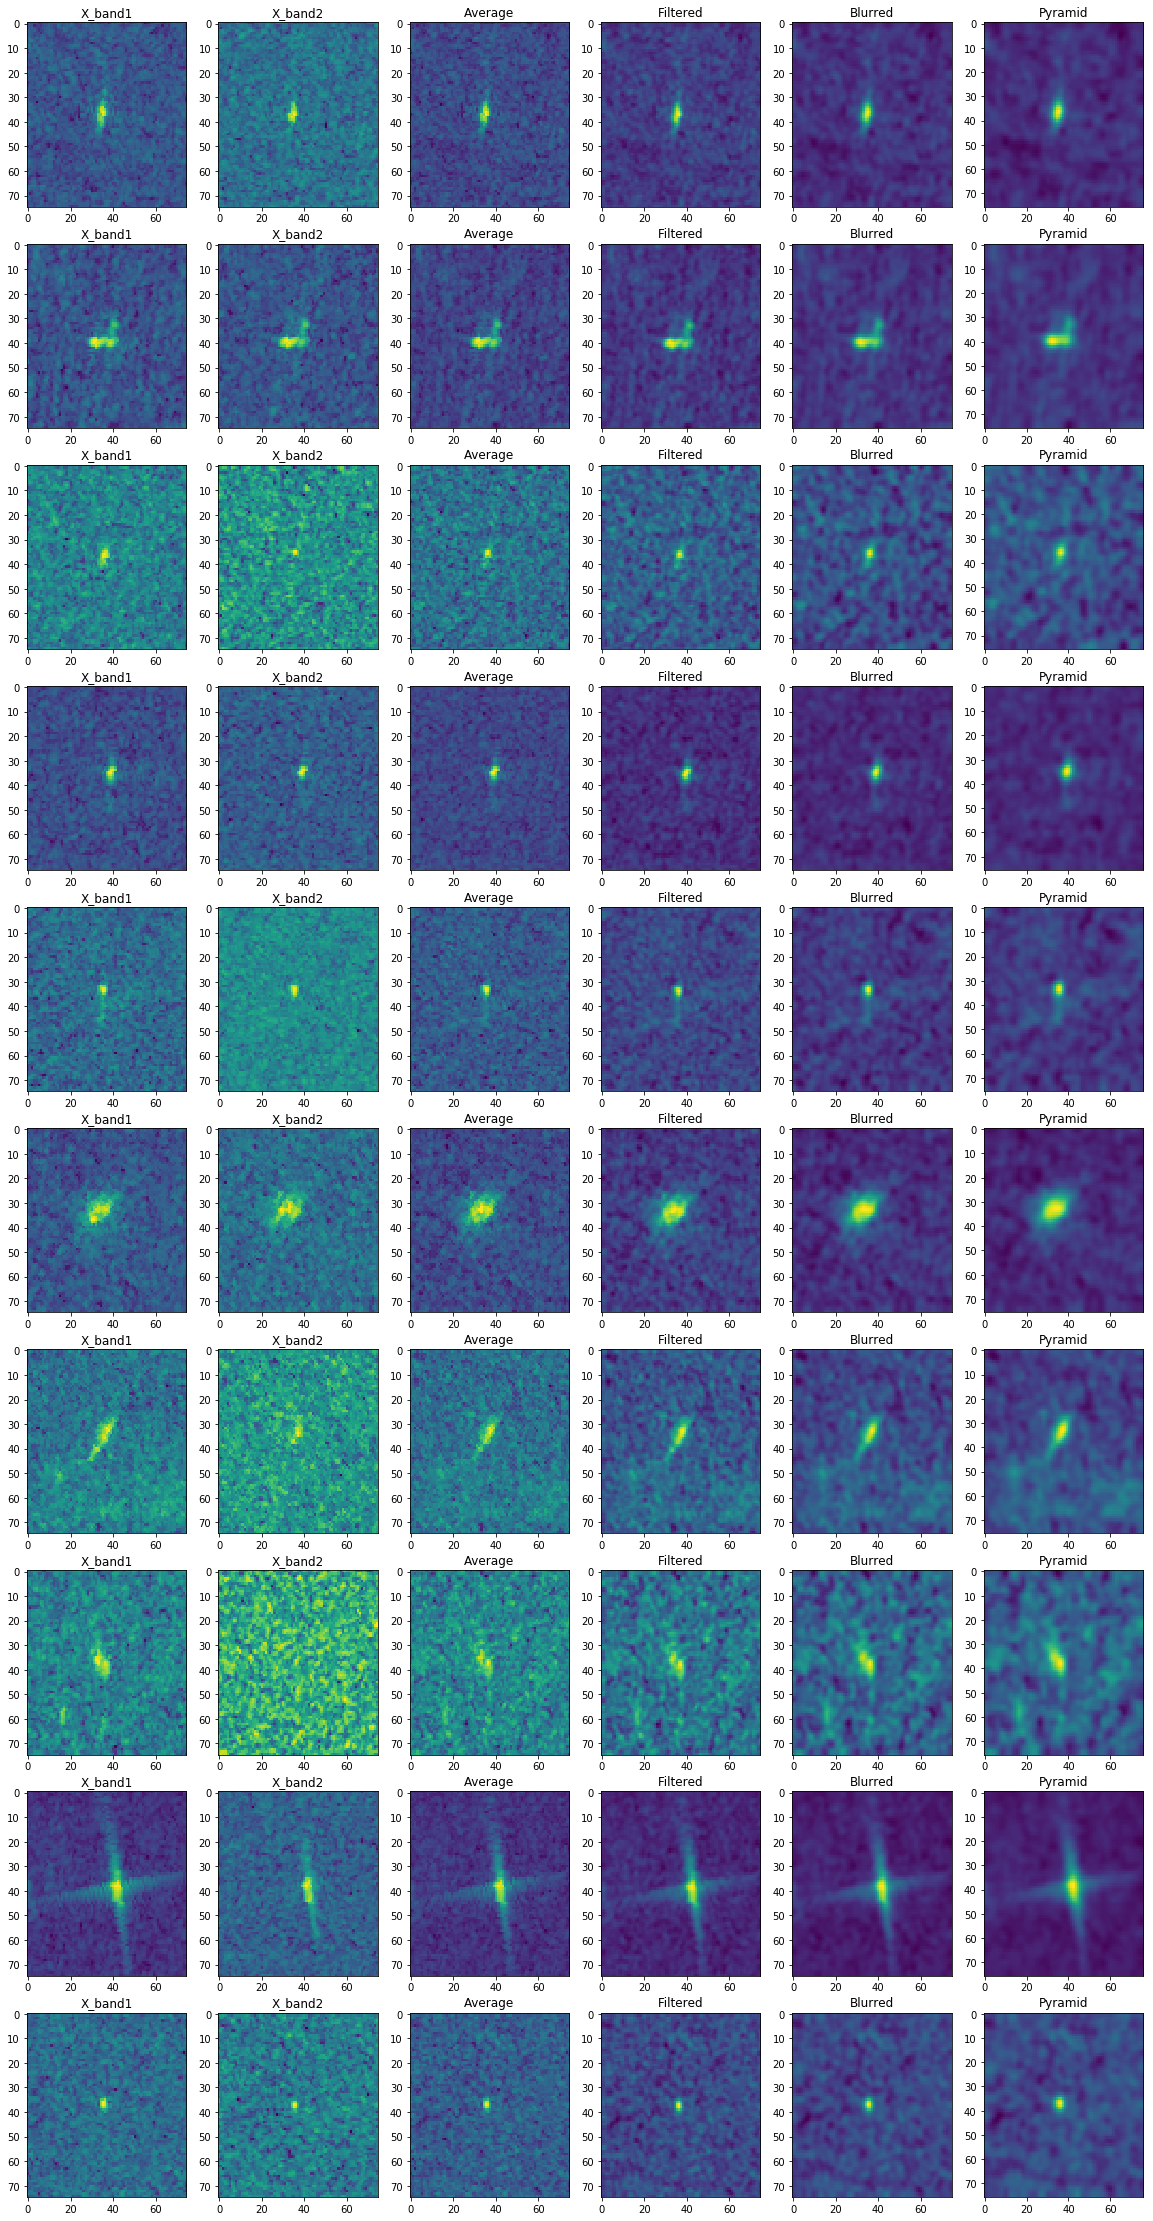

In [180]:
counter = 1
plt.figure(figsize=(20,40))

n_cols = 10
n_rows = 6
for i in range(0,20):
    img1 = np.array(df['band_1'].iloc[i]).reshape(75,75)  #1
    img2 = np.array(df['band_2'].iloc[i]).reshape(75,75)  #2
    img = (img1+img2)/2  #3
    dst = cv2.filter2D(img,-1,kernel)  #4
    blur = cv2.GaussianBlur(img,(5,5),0)  #5
    
    lower_reso = cv2.pyrDown(img)
    lower_reso = cv2.pyrUp(lower_reso)  #6
    
    
    
    for j in [1,2,3,4,5,6]:
        if counter> (n_cols*n_rows):
            break
        if (j == 1):
            plt.subplot(n_cols,n_rows,counter),plt.imshow(img1, interpolation='nearest', aspect='auto')
            plt.title('X_band1')
            counter = counter + 1
        elif(j == 2):
            plt.subplot(n_cols,n_rows,counter),plt.imshow(img2, interpolation='nearest', aspect='auto')
            plt.title('X_band2')
            counter = counter + 1
        elif(j == 3):
            plt.subplot(n_cols,n_rows,counter),plt.imshow(img, interpolation='nearest', aspect='auto')
            plt.title('Average')
            counter = counter + 1
        elif(j == 4):
            plt.subplot(n_cols,n_rows,counter),plt.imshow(dst, interpolation='nearest', aspect='auto')
            plt.title('Filtered')
            counter = counter + 1
        elif(j == 5):
            plt.subplot(n_cols,n_rows,counter),plt.imshow(blur, interpolation='nearest', aspect='auto')
            plt.title('Blurred')
            counter = counter + 1
        elif(j == 6):
            plt.subplot(n_cols,n_rows,counter),plt.imshow(lower_reso, interpolation='nearest', aspect='auto')
            plt.title('Pyramid')
            counter = counter + 1

In [26]:
a = cv2.resize((np.array(df['band_1'].iloc[6]).reshape(75, 75)), (65,65))

(<matplotlib.axes._subplots.AxesSubplot at 0x22b80a9fbe0>,
 <matplotlib.image.AxesImage at 0x22b80d446a0>)

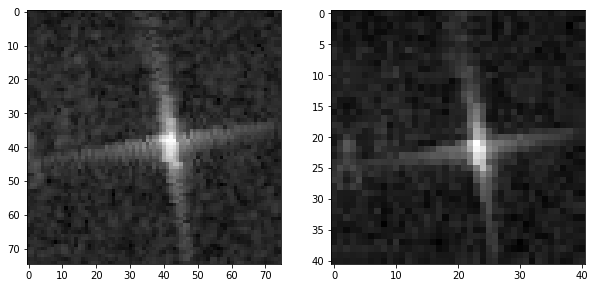

In [178]:
plt.figure(figsize=(10,10))

img = np.array(df['band_1'].iloc[8]).reshape(75, 75)
coeffs = pywt.dwt2(img, 'db4', mode='symmetric')

plt.subplot(121),plt.imshow(img, cmap='gray')
plt.subplot(122),plt.imshow(coeffs[0], cmap='gray')

In [168]:
#plt.imshow(scipy.misc.imresize(img, (75, 75)))

In [96]:
scipy.misc.imresize(img, 200).astype(np.float32)

array([[ 79.,  71.,  55., ...,  60.,  50.,  45.],
       [ 72.,  63.,  46., ...,  69.,  61.,  57.],
       [ 59.,  48.,  27., ...,  88.,  83.,  81.],
       ..., 
       [ 62.,  68.,  81., ...,  69.,  76.,  79.],
       [ 63.,  70.,  86., ...,  68.,  64.,  62.],
       [ 63.,  71.,  88., ...,  67.,  58.,  53.]], dtype=float32)

In [5]:
df = df[~(df['inc_angle'] == 'na')]
df.reset_index(drop=True, inplace=True)

In [213]:
im1 = df.band_1.apply(np.array).apply(lambda x: x.reshape(75, 75)).tolist()

In [191]:
im1 = np.array(im1)

In [205]:
blur = cv2.GaussianBlur(im1,(5,5),0)

In [194]:
blur.shape

(1604, 75, 75)

In [195]:
dst = cv2.filter2D(im1,-1,kernel)

In [196]:
dst.shape

(1604, 75, 75)

In [206]:
blur =  np.transpose(blur, axes=(2, 1, 0))

In [207]:
blur.shape

(75, 75, 1604)

In [209]:
np.transpose(blur, axes=(2, 1, 0)).shape

(1604, 75, 75)

In [217]:
def foo(img_list):
    result = []
    for img in img_list:
        _blur = cv2.GaussianBlur(img,(5,5),0)
        result.append(img)

    return np.array(result)

In [219]:
foo(im1).shape

(1604, 75, 75)